# San Francisco Crime Classification

Dates - timestamp of the crime incident<br>
Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.<br>
Descript - detailed description of the crime incident (only in train.csv)<br>
DayOfWeek - the day of the week<br>
PdDistrict - name of the Police Department District<br>
Resolution - how the crime incident was resolved (only in train.csv)<br>
Address - the approximate street address of the crime incident<br>
X - Longitude<br>
Y - Latitude<br>

[데이터 다운로드 링크](https://www.kaggle.com/c/sf-crime/data)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
print(train.shape)
print(test.shape)

(878049, 9)
(884262, 7)


In [3]:
train.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


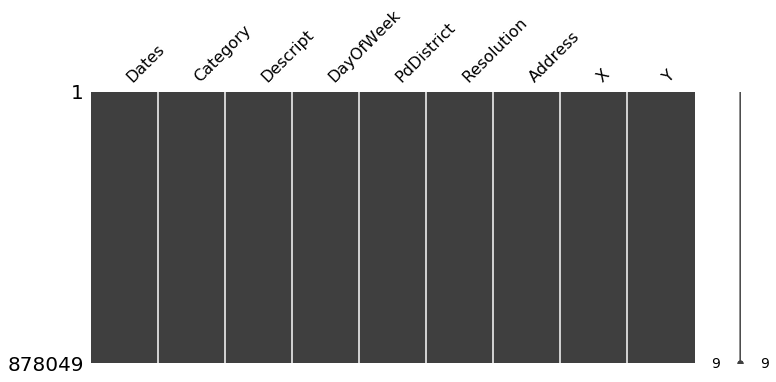

In [5]:
msno.matrix(train, figsize=(12, 5))

In [6]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [7]:
test.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

# Data Processing

## -Dates

In [8]:
train["Dates"] = pd.to_datetime(train["Dates"])

train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)

train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


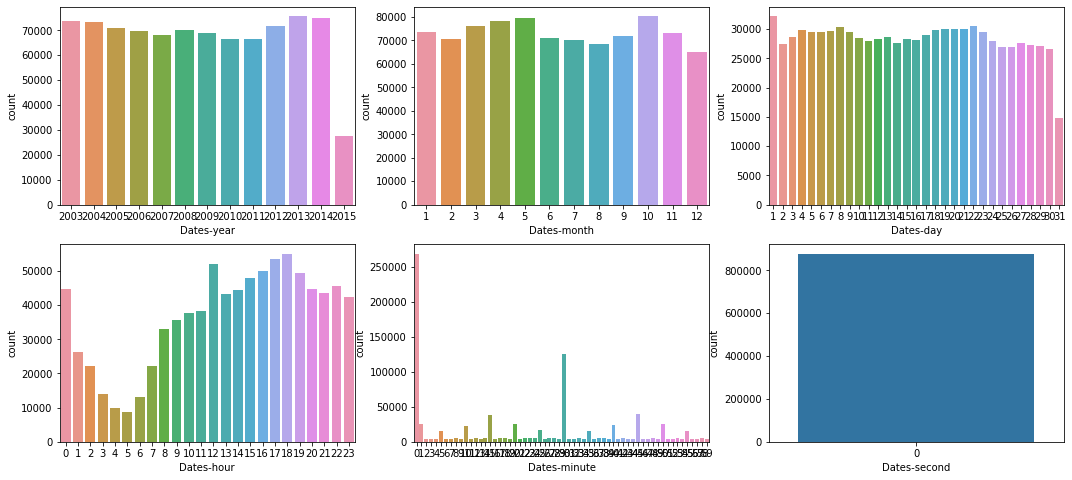

In [9]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.countplot(data=train, x="Dates-year", ax=ax1)
sns.countplot(data=train, x="Dates-month", ax=ax2)
sns.countplot(data=train, x="Dates-day", ax=ax3)
sns.countplot(data=train, x="Dates-hour", ax=ax4)
sns.countplot(data=train, x="Dates-minute", ax=ax5)
sns.countplot(data=train, x="Dates-second", ax=ax6)

In [9]:
test["Dates"] = pd.to_datetime(test["Dates"])

test["Dates-year"] = test["Dates"].dt.year
test["Dates-month"] = test["Dates"].dt.month
test["Dates-day"] = test["Dates"].dt.day
test["Dates-hour"] = test["Dates"].dt.hour
test["Dates-minute"] = test["Dates"].dt.minute
test["Dates-second"] = test["Dates"].dt.second

print(test.shape)

test[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute"]].head()

(884262, 13)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute
0,2015-05-10 23:59:00,2015,5,10,23,59
1,2015-05-10 23:51:00,2015,5,10,23,51
2,2015-05-10 23:50:00,2015,5,10,23,50
3,2015-05-10 23:45:00,2015,5,10,23,45
4,2015-05-10 23:45:00,2015,5,10,23,45


## -X, Y

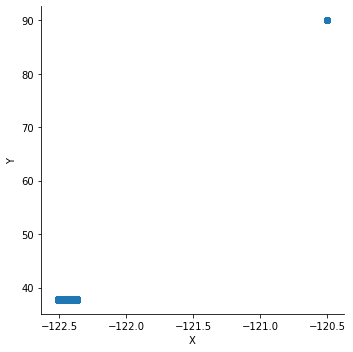

In [11]:
sns.lmplot(data=train, x="X", y="Y", fit_reg=False)

In [12]:
train["X"].max(), train["Y"].max()

(-120.5, 90.0)

In [10]:
X_outlier = (train["X"] == train["X"].max())
Y_outlier = (train["Y"] == train["Y"].max())

outlier = train[X_outlier & Y_outlier]

print(outlier.shape)
outlier.head()

(67, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,0


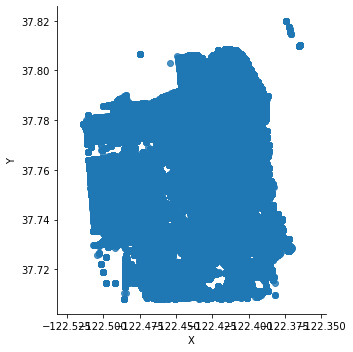

In [11]:
non_outliers = train[~(X_outlier & Y_outlier)]
sns.lmplot(data=non_outliers, x="X", y="Y", fit_reg=False)

## -Category Value Counts

In [12]:
non_outliers["Category"].value_counts()

LARCENY/THEFT                  174885
OTHER OFFENSES                 126165
NON-CRIMINAL                    92300
ASSAULT                         76872
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53772
VANDALISM                       44724
WARRANTS                        42206
BURGLARY                        36754
SUSPICIOUS OCC                  31412
MISSING PERSON                  25989
ROBBERY                         22999
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7325
STOLEN PROPERTY                  4539
SEX OFFENSES FORCIBLE            4387
DISORDERLY CONDUCT               4318
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

## -DayOfWeek

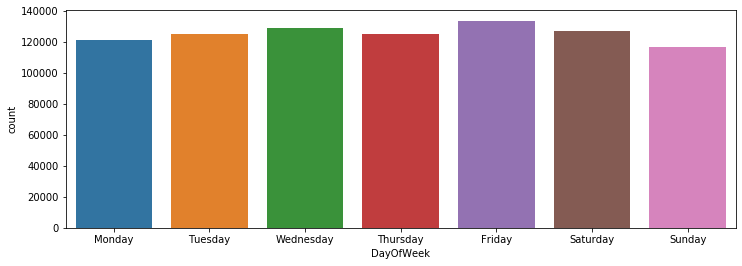

In [16]:
plt.figure(figsize = (12, 4))
dayofweek_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(data=non_outliers, x="DayOfWeek", order=dayofweek_list)

In [13]:
category_list = non_outliers["Category"].value_counts().index

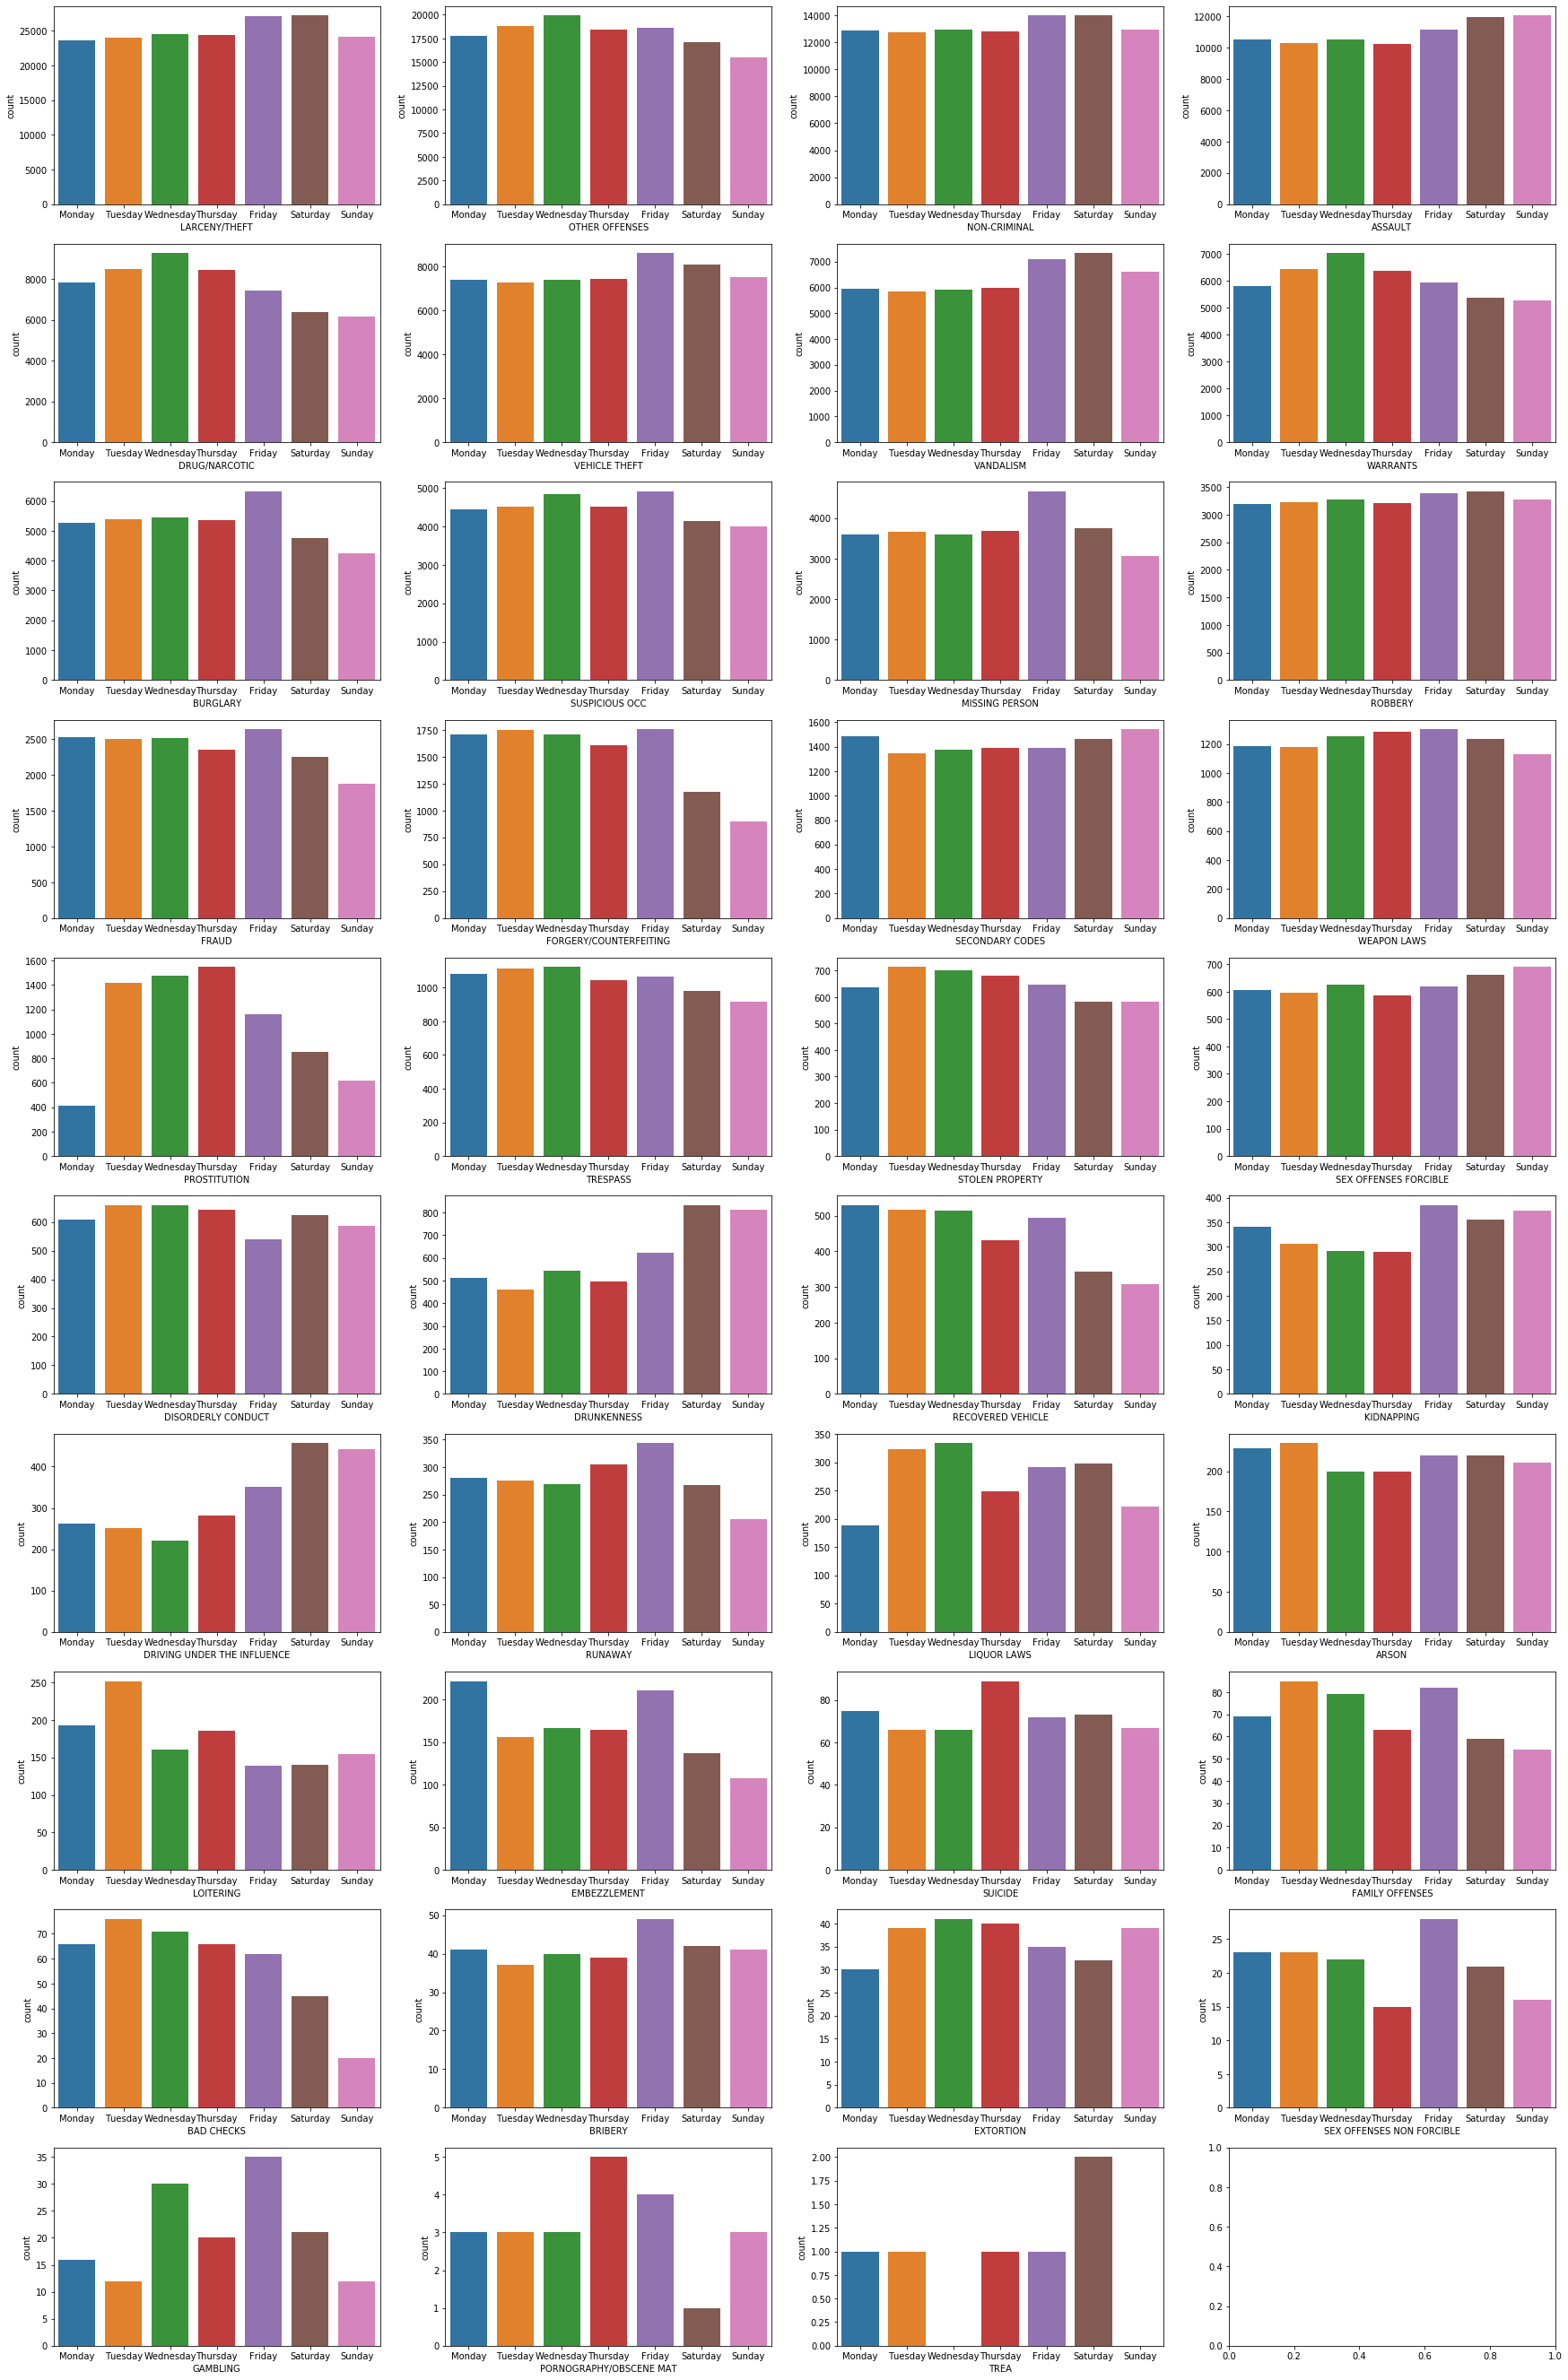

In [21]:
figure, axes = plt.subplots(nrows = 10, ncols = 4)

# set_size_inches(w, h, forward=False)는 inch단위로 figure의 크기를 바꿔줍니다. 
# forward=True로 설정할 경우에는 캔버스 사이즈가 자동으로 업데이트 됩니다(사용 중인 gui window에서 바로 반영 됨)
figure.set_size_inches(30, 48)

for row in range(10):
    for column in range(4):
        
        index = row * 4 + column
        
        if index < len(category_list):
            ax = axes[row][column]

            category = category_list[index]
        
            target = non_outliers[non_outliers["Category"] == category]

            sns.countplot(data = target, x = "DayOfWeek", order = dayofweek_list, ax = ax)

            ax.set(xlabel = category)

In [14]:
non_outliers_dayofweek = pd.get_dummies(non_outliers["DayOfWeek"], prefix = "DayOfWeek")
non_outliers = pd.concat([non_outliers, non_outliers_dayofweek], axis = 1)

print(non_outliers.shape)
non_outliers.head()

(877982, 22)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,Dates-hour,Dates-minute,Dates-second,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,23,53,0,0,0,0,0,0,0,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,23,53,0,0,0,0,0,0,0,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,23,33,0,0,0,0,0,0,0,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,23,30,0,0,0,0,0,0,0,1
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,23,30,0,0,0,0,0,0,0,1


In [15]:
test_dayofweek = pd.get_dummies(test["DayOfWeek"], prefix = "DayOfWeek")
test = pd.concat([test, test_dayofweek], axis = 1)

print(test.shape)
test.head()

(884262, 20)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,0,0,0,0,1,0,0,0
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,0,0,0,0,1,0,0,0
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,0,0,0,0,1,0,0,0
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,0,0,0,1,0,0,0
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,0,0,0,0,1,0,0,0


## -PdDistrict

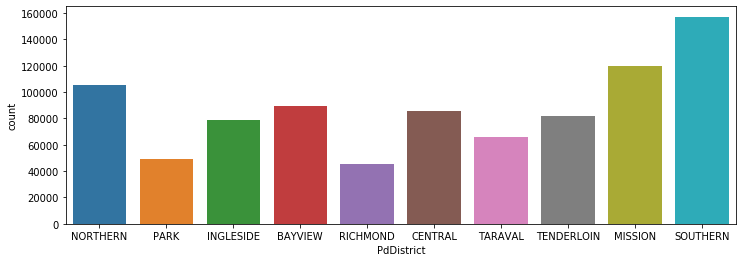

In [24]:
plt.figure(figsize = (12, 4))
sns.countplot(data=non_outliers, x="PdDistrict")

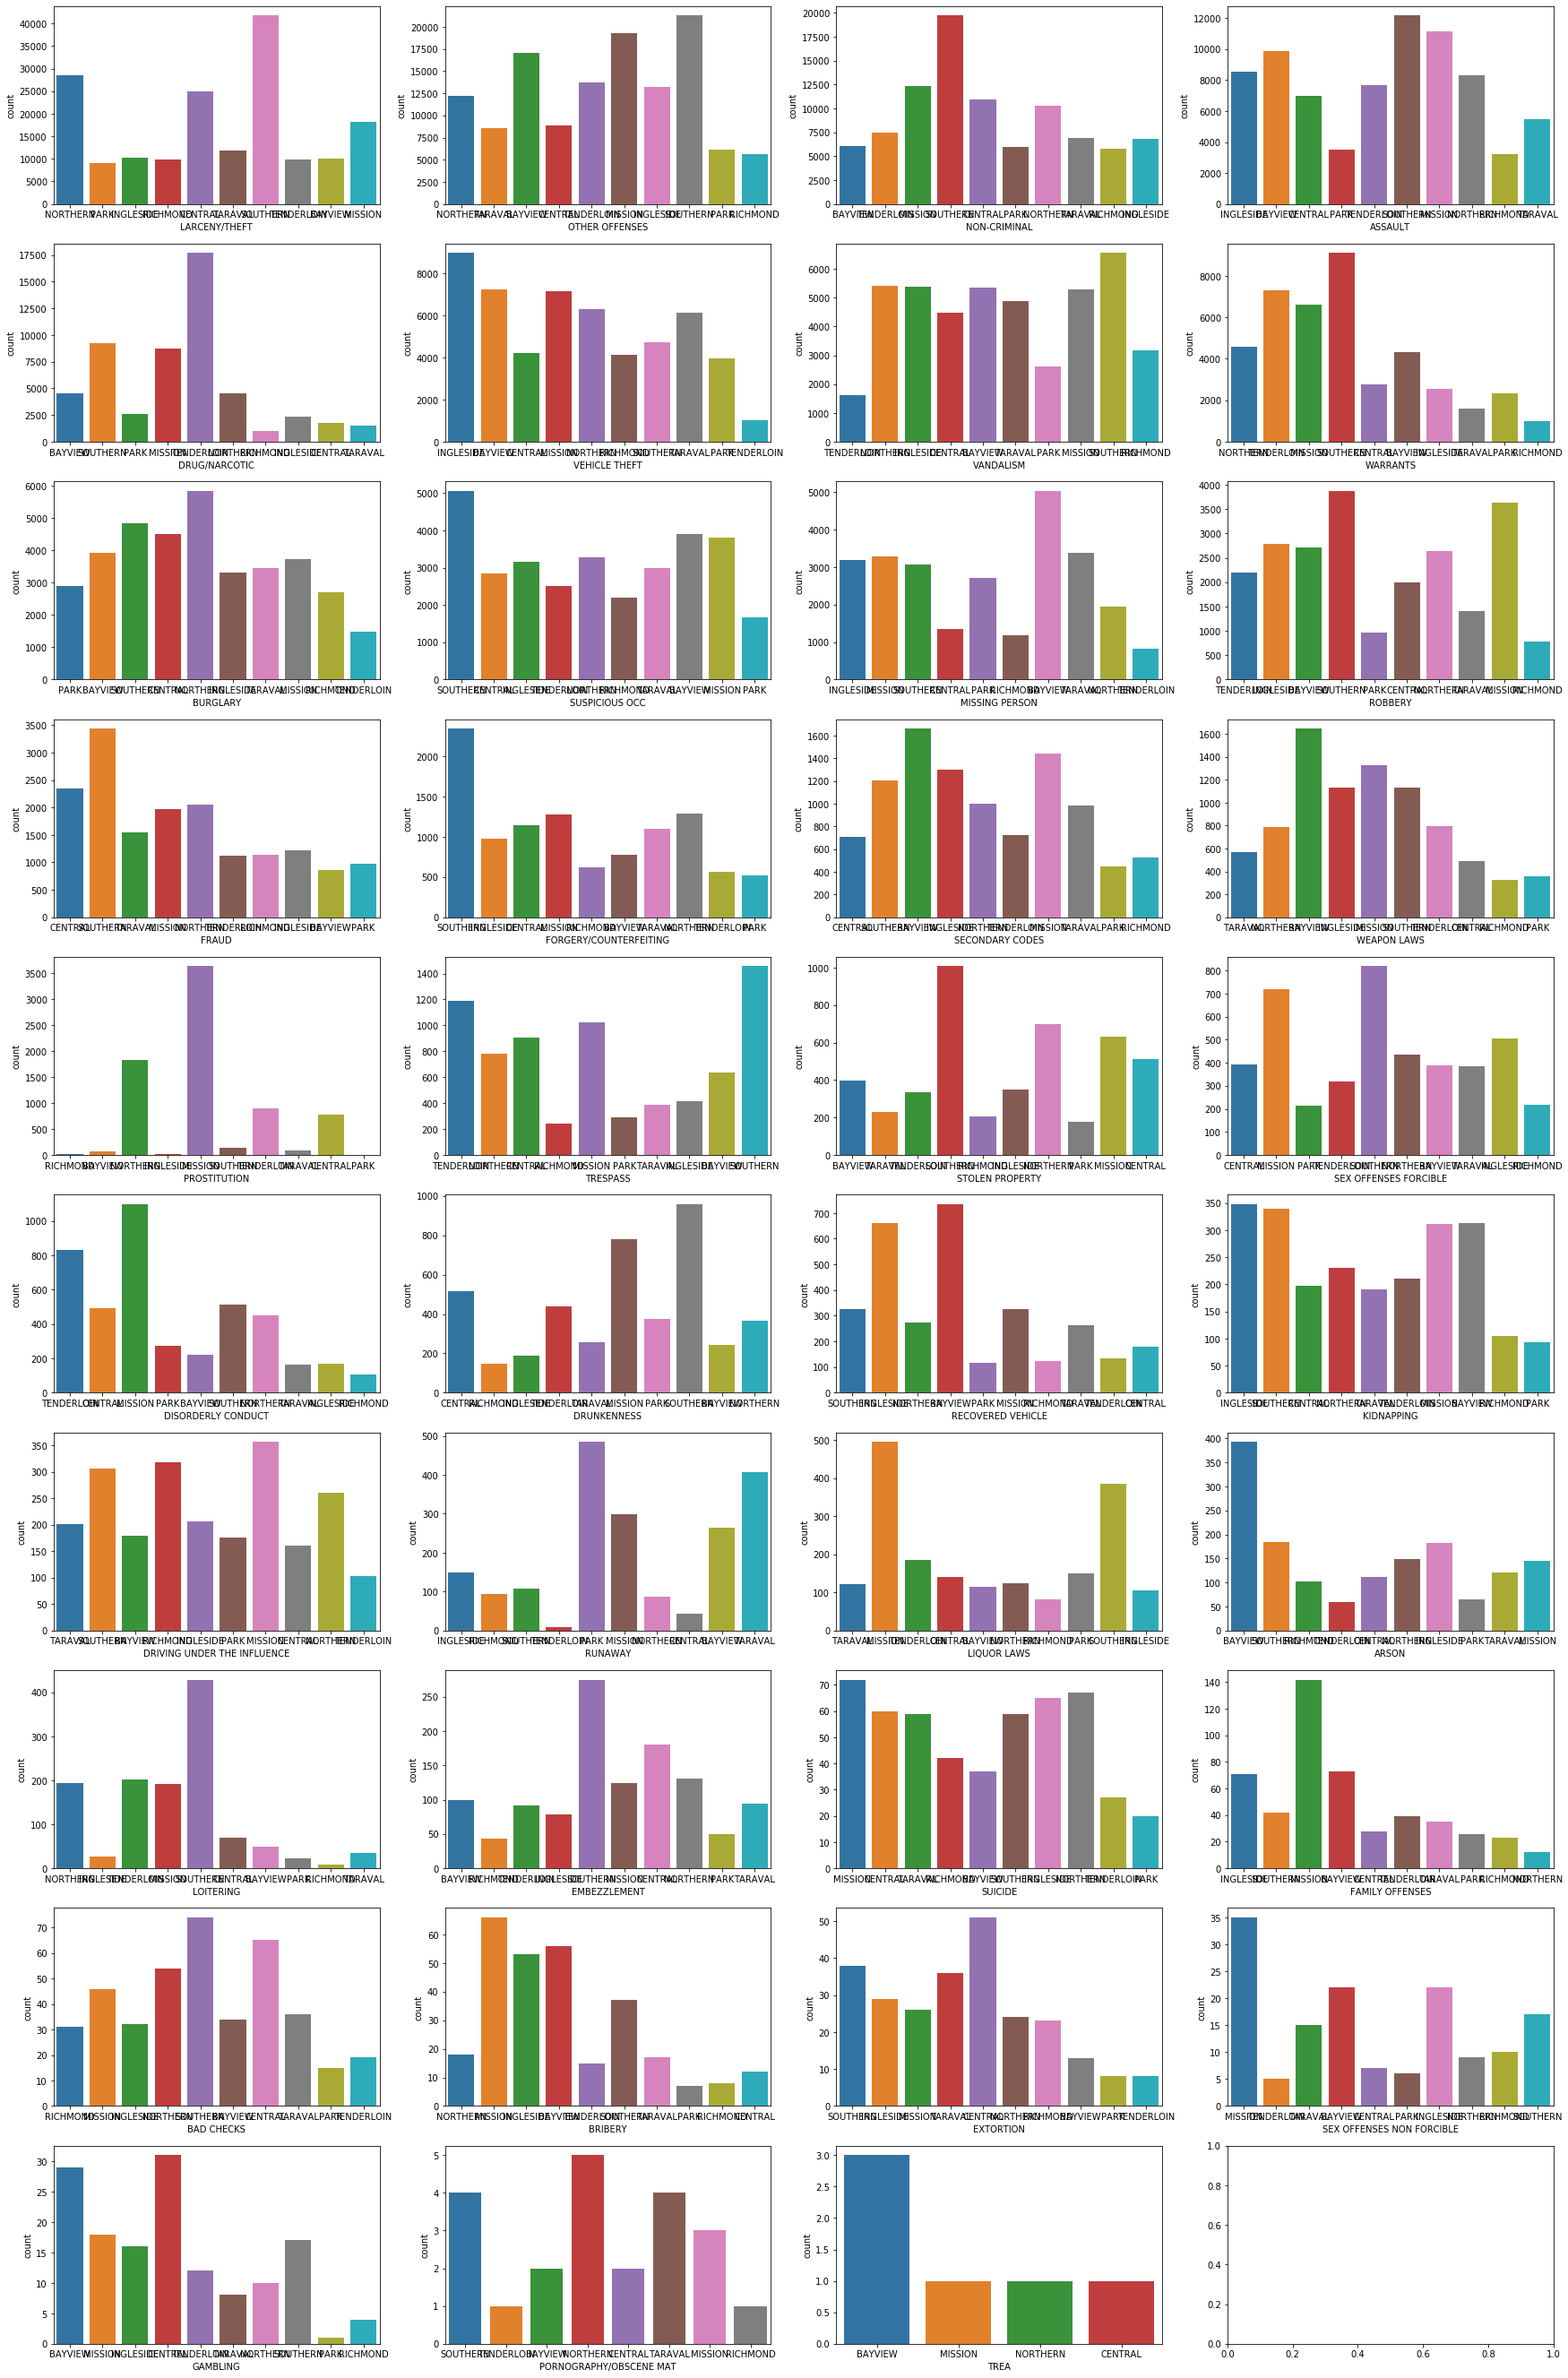

In [25]:
figure, axes = plt.subplots(nrows = 10, ncols = 4)

figure.set_size_inches(30, 48)

for row in range(10):
    for column in range(4):

        index = row * 4 + column

        if index < len(category_list):
            ax = axes[row][column]
            
            category = category_list[index]

            target = non_outliers[non_outliers["Category"] == category]
            
            sns.countplot(data = target, x = "PdDistrict", ax = ax)

            ax.set(xlabel = category)

In [16]:
non_outliers_pddistrict = pd.get_dummies(non_outliers["PdDistrict"], prefix = "PdDistrict")
non_outliers = pd.concat([non_outliers, non_outliers_pddistrict], axis = 1)

print(non_outliers.shape)
non_outliers.head()

(877982, 32)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,...,0,0,0,0,1,0,0,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,...,0,0,0,0,1,0,0,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,...,0,0,0,0,1,0,0,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,...,0,0,0,0,0,1,0,0,0,0


In [17]:
test_pddistrict = pd.get_dummies(test["PdDistrict"], prefix = "PdDistrict")
test = pd.concat([test, test_pddistrict], axis = 1)

print(test.shape)
test.head()

(884262, 30)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,...,1,0,0,0,0,0,0,0,0,0
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,...,1,0,0,0,0,0,0,0,0,0
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,...,0,0,0,0,1,0,0,0,0,0
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,0,0,1,0,0,0,0,0,0,0
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,...,0,0,1,0,0,0,0,0,0,0


## -Address

In [20]:
non_outliers["Crossroad"] = non_outliers["Address"].str.contains("/")
print(non_outliers.shape)
non_outliers[["Address", "Crossroad"]].head()

(877982, 33)


,Address,Crossroad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


In [21]:
test["Crossroad"] = test["Address"].str.contains("/")
print(test.shape)
test[["Address", "Crossroad"]].head()

(884262, 31)


,Address,Crossroad
0,2000 Block of THOMAS AV,False
1,3RD ST / REVERE AV,True
2,2000 Block of GOUGH ST,False
3,4700 Block of MISSION ST,False
4,4700 Block of MISSION ST,False


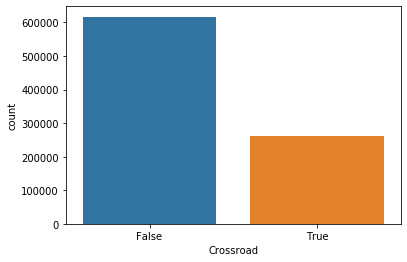

In [22]:
sns.countplot(data=non_outliers, x="Crossroad")

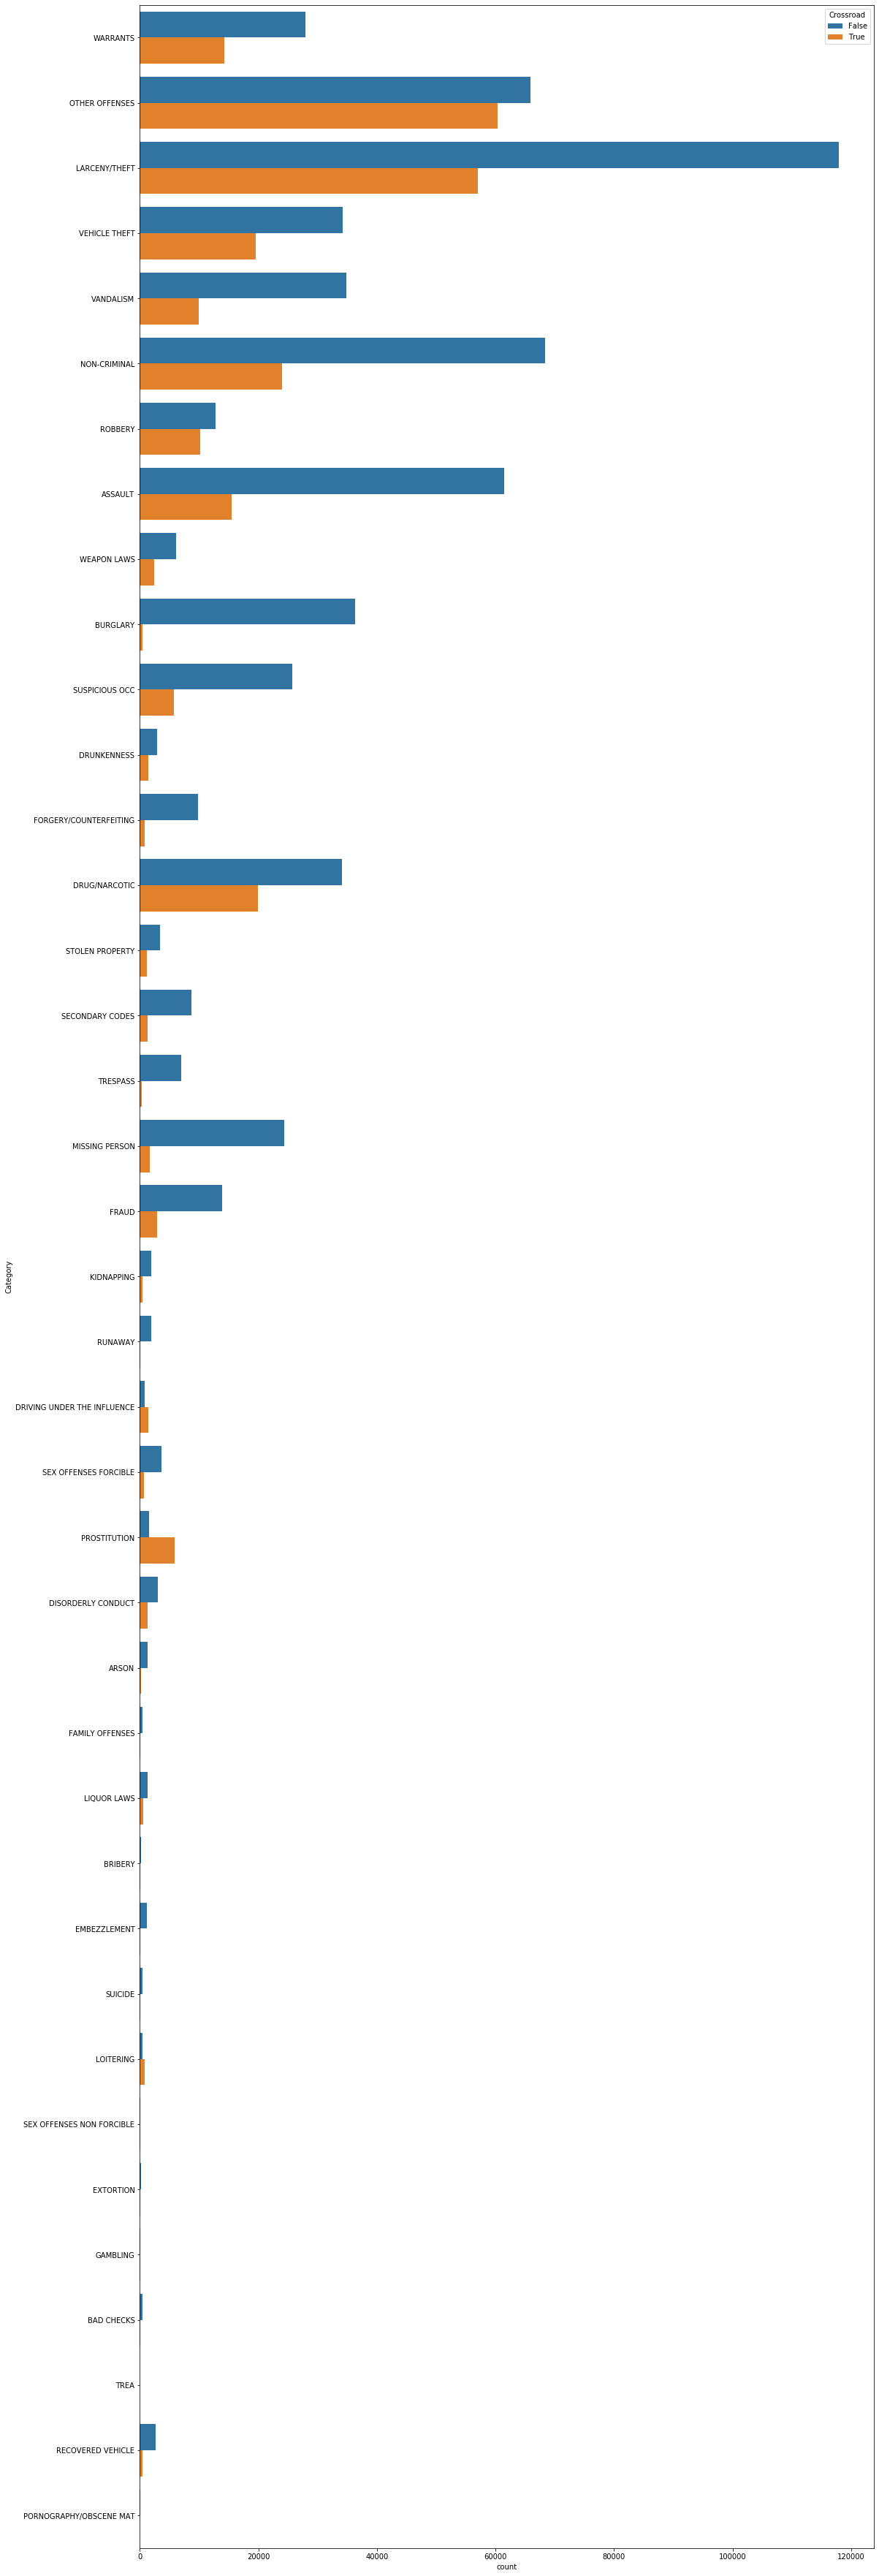

In [23]:
plt.figure(figsize = (18, 64))

sns.countplot(data=non_outliers, hue="Crossroad", y="Category")

### Address 정리

In [24]:
def clean_address(address):
    if "/" not in address:
        return address

    address1, address2 = address.split("/")
    address1, address2 = address1.strip(), address2.strip()

    if address1 < address2:
        address = "{} / {}".format(address1, address2)
    else:
        address = "{} / {}".format(address2, address1)

    return address

non_outliers["Address(clean)"] = non_outliers["Address"].apply(clean_address)
print(non_outliers.shape)
non_outliers[["Address", "Address(clean)"]].head()

(877982, 34)


,Address,Address(clean)
0,OAK ST / LAGUNA ST,LAGUNA ST / OAK ST
1,OAK ST / LAGUNA ST,LAGUNA ST / OAK ST
2,VANNESS AV / GREENWICH ST,GREENWICH ST / VANNESS AV
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,100 Block of BRODERICK ST


In [25]:
test["Address(clean)"] = test["Address"].apply(clean_address)
print(test.shape)
test[["Address", "Address(clean)"]].head()

(884262, 32)


,Address,Address(clean)
0,2000 Block of THOMAS AV,2000 Block of THOMAS AV
1,3RD ST / REVERE AV,3RD ST / REVERE AV
2,2000 Block of GOUGH ST,2000 Block of GOUGH ST
3,4700 Block of MISSION ST,4700 Block of MISSION ST
4,4700 Block of MISSION ST,4700 Block of MISSION ST


### Address 100이상만

In [26]:
address_counts = non_outliers["Address(clean)"].value_counts()
top_address_counts = address_counts[address_counts >= 100]
top_address_counts = top_address_counts.index

print(len(top_address_counts))
top_address_counts

1719


Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '16TH ST / MISSION ST', '900 Block of MARKET ST', '0 Block of TURK ST',
       '0 Block of 6TH ST', '300 Block of ELLIS ST', '400 Block of ELLIS ST',
       ...
       'LANE ST / PALOU AV', '300 Block of BUCHANAN ST',
       '400 Block of PARNASSUS AV', '0 Block of LAGUNA ST',
       'BROADWAY ST / POWELL ST', '200 Block of BUCKINGHAM WY',
       '700 Block of WEBSTER ST', 'HOWARD ST / THE EMBARCADEROSOUTH ST',
       '1800 Block of SUTTER ST', '2100 Block of FULTON ST'],
      dtype='object', length=1719)

In [27]:
non_outliers.loc[~non_outliers["Address(clean)"].isin(top_address_counts), "Address(clean)"] = "Others"
print(non_outliers.shape)
non_outliers[["Address", "Address(clean)"]].head()

(877982, 34)


,Address,Address(clean)
0,OAK ST / LAGUNA ST,Others
1,OAK ST / LAGUNA ST,Others
2,VANNESS AV / GREENWICH ST,Others
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,Others


In [28]:
test.loc[~test["Address(clean)"].isin(top_address_counts), "Address(clean)"] = "Others"
print(test.shape)
test[["Address", "Address(clean)"]].head()

(884262, 32)


,Address,Address(clean)
0,2000 Block of THOMAS AV,Others
1,3RD ST / REVERE AV,3RD ST / REVERE AV
2,2000 Block of GOUGH ST,Others
3,4700 Block of MISSION ST,4700 Block of MISSION ST
4,4700 Block of MISSION ST,4700 Block of MISSION ST


In [29]:
non_outliers_address = pd.get_dummies(non_outliers["Address(clean)"])

print(non_outliers_address.shape)
non_outliers_address.head()

(877982, 1720)


,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,SANTOS ST / SUNNYDALE AV,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
test_address = pd.get_dummies(test["Address(clean)"])

print(test_address.shape)
test_address.head()

(884262, 1720)


,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,SANTOS ST / SUNNYDALE AV,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### csr_matrix(메모리 효율적 저장)

In [31]:
from scipy.sparse import csr_matrix

non_outliers_address = csr_matrix(non_outliers_address)
non_outliers_address

<877982x1720 sparse matrix of type '<class 'numpy.uint8'>'
	with 877982 stored elements in Compressed Sparse Row format>

In [32]:
test_address = csr_matrix(test_address)
test_address

<884262x1720 sparse matrix of type '<class 'numpy.uint8'>'
	with 884262 stored elements in Compressed Sparse Row format>

# Learning

In [33]:
print(non_outliers.columns)
print(non_outliers.columns.shape)

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Dates-year', 'Dates-month',
       'Dates-day', 'Dates-hour', 'Dates-minute', 'Dates-second',
       'DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday',
       'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday',
       'DayOfWeek_Wednesday', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL',
       'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN',
       'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN',
       'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'Crossroad',
       'Address(clean)'],
      dtype='object')
(34,)


In [34]:
feature_names = ["X", "Y", "Crossroad"]

feature_names = feature_names + ["Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute"]

feature_names = feature_names + list(non_outliers_dayofweek.columns)

feature_names = feature_names + list(non_outliers_pddistrict.columns)

feature_names

['X',
 'Y',
 'Crossroad',
 'Dates-year',
 'Dates-month',
 'Dates-day',
 'Dates-hour',
 'Dates-minute',
 'DayOfWeek_Friday',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'PdDistrict_BAYVIEW',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN']

In [35]:
X_train = non_outliers[feature_names]
print(X_train.shape)
X_train.head()

(877982, 25)


,X,Y,Crossroad,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,DayOfWeek_Friday,DayOfWeek_Monday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.425892,37.774599,True,2015,5,13,23,53,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-122.425892,37.774599,True,2015,5,13,23,53,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-122.424363,37.800414,True,2015,5,13,23,33,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.426995,37.800873,False,2015,5,13,23,30,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-122.438738,37.771541,False,2015,5,13,23,30,0,0,...,0,0,0,0,0,1,0,0,0,0


### CSR Matrix 하나로 합치기

In [36]:
from scipy.sparse import hstack

In [37]:
X_train = hstack([X_train.astype('float'), non_outliers_address])
X_train = csr_matrix(X_train)
X_train

<877982x1745 sparse matrix of type '<class 'numpy.float64'>'
	with 8726783 stored elements in Compressed Sparse Row format>

In [48]:
label_name = "Category"
y_train = non_outliers[label_name]
print(y_train.shape)
y_train.head()

(877982,)


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

In [49]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(884262, 25)


,X,Y,Crossroad,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,DayOfWeek_Friday,DayOfWeek_Monday,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.399588,37.735051,False,2015,5,10,23,59,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-122.391523,37.732432,True,2015,5,10,23,51,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-122.426002,37.792212,False,2015,5,10,23,50,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-122.437394,37.721412,False,2015,5,10,23,45,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-122.437394,37.721412,False,2015,5,10,23,45,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
X_test = hstack([X_test.astype('float'), test_address])
X_test = csr_matrix(X_test)
X_test

<884262x1745 sparse matrix of type '<class 'numpy.float64'>'
	with 8787000 stored elements in Compressed Sparse Row format>

# Use Gradient Boosting Machine(LightGBM)

In [51]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Evaluate

In [52]:
# 이 함수는 데이터를 일정 비율로 두 개로 쪼개는 역할을 담당합니다.
from sklearn.model_selection import train_test_split

# train 데이터를 두 개로 쪼갭니다. 쪼개는 비율은 7:3으로 할 것이며
# 7의 부분이 X_train_kf와 y_train_kf로 들어가고, 3의 부분이 X_test_kf와 y_test_kf로 들어갑니다.
# 실행할때마다 매 번 동일한 결과가 나오도록 하기 위해 random_state 옵션을 줘서 seed를 고정.
X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

print(X_train_kf.shape, y_train_kf.shape)
print(X_test_kf.shape, y_test_kf.shape)

(614587, 1745) (614587,)
(263395, 1745) (263395,)


In [53]:
%time model.fit(X_train_kf, y_train_kf)

CPU times: user 10min 48s, sys: 8.9 s, total: 10min 57s
Wall time: 1min 33s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [54]:
y_predict_test_kf = model.predict_proba(X_test_kf)

print(y_predict_test_kf.shape)

y_predict_test_kf

(263395, 39)


array([[2.60963136e-04, 4.69741904e-02, 4.76060598e-06, ...,
        1.15116365e-02, 2.10686334e-02, 6.76008003e-03],
       [5.25127046e-04, 8.03720465e-02, 9.08310267e-06, ...,
        2.69262551e-02, 1.32004396e-01, 9.18032354e-03],
       [9.52155513e-04, 1.12814077e-01, 2.27371099e-05, ...,
        4.86776643e-02, 3.04656095e-02, 5.01647950e-03],
       ...,
       [3.03655537e-04, 5.01758864e-02, 1.45991141e-05, ...,
        8.92363488e-03, 8.09714075e-02, 1.12533291e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.07713220e-03, 5.43255506e-02, 0.00000000e+00, ...,
        3.37725842e-02, 9.05631363e-03, 2.23659663e-03]])

In [55]:
from sklearn.metrics import log_loss

score = log_loss(y_test_kf, y_predict_test_kf)

print(f"Score = {score:.5f}")

Score = 5.42186


# Predict

In [56]:
%time model.fit(X_train, y_train)

CPU times: user 14min 23s, sys: 11.5 s, total: 14min 34s
Wall time: 2min 3s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [58]:
prediction_list = model.predict_proba(X_test)

print(prediction_list.shape)

prediction_list

(884262, 39)


array([[3.19459628e-03, 1.59843149e-01, 1.23272960e-04, ...,
        6.92937187e-02, 6.14703322e-02, 3.14914689e-02],
       [1.36145555e-03, 6.79386730e-02, 7.75018336e-06, ...,
        1.22937792e-02, 9.08184777e-02, 3.16156972e-02],
       [1.47121032e-03, 1.16017723e-01, 3.59785537e-05, ...,
        2.44458623e-02, 3.87672416e-02, 8.89980002e-03],
       ...,
       [1.15318853e-03, 7.78972131e-02, 9.50551982e-05, ...,
        5.10620301e-02, 1.81587954e-02, 6.74649967e-03],
       [1.38370921e-03, 5.83506352e-02, 3.63034655e-04, ...,
        1.31306271e-01, 1.62546862e-02, 4.76749953e-03],
       [1.19707623e-03, 6.54286839e-02, 0.00000000e+00, ...,
        4.72450441e-02, 1.40150700e-02, 5.02504297e-03]])

# Submit

In [63]:
submission = pd.read_csv("data/sampleSubmission.csv", index_col = "Id")

print(submission.shape)

submission.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
submission_submit = pd.DataFrame(prediction_list,
                          index = submission.index,
                          columns = model.classes_)

print(submission_submit.shape)

submission_submit.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.003195,0.159843,0.000123,0.000476,0.030206,0.002184,0.006162,0.044646,0.005140,0.000463,...,2.359063e-05,0.007690,0.000462,0.048338,0.000000e+00,0.008519,0.065484,0.069294,0.061470,0.031491
1,0.001361,0.067939,0.000008,0.000006,0.001884,0.001912,0.008192,0.079887,0.005849,0.000053,...,7.461937e-07,0.005824,0.000029,0.029990,0.000000e+00,0.001226,0.024946,0.012294,0.090818,0.031616
2,0.001471,0.116018,0.000036,0.000033,0.070139,0.001817,0.003975,0.021325,0.007284,0.000369,...,1.570662e-05,0.009432,0.000469,0.040392,0.000000e+00,0.009654,0.059723,0.024446,0.038767,0.008900
3,0.002716,0.166654,0.000013,0.000000,0.028445,0.002765,0.004989,0.032271,0.007803,0.000401,...,9.229721e-07,0.007953,0.000054,0.047011,6.609262e-154,0.008227,0.057840,0.022271,0.040628,0.018579
4,0.002716,0.166654,0.000013,0.000000,0.028445,0.002765,0.004989,0.032271,0.007803,0.000401,...,9.229721e-07,0.007953,0.000054,0.047011,6.609262e-154,0.008227,0.057840,0.022271,0.040628,0.018579


In [62]:
submission_submit.to_csv("data/sf-crime_200224.csv")